In [2]:
Assignment 02 - Movie data set
Student: Mai Dang Phap
    
Table of contents
I. Phân tích ảnh hưởng của 'production_countries' lên 'revenue' (câu 1)
1. Thống kê mô tả 'revenue'
 1.1. (loại các quan sát outliers) ('phim phổ thông')
 1.2. Revenue (outliers) ('phim bom tấn')
 1.3. Revenue bimodal distribution
2. Thống kê mô tả 'production_countries'
 2.1. Xử lý dữ liệu
3. ANOVA
 3.1. Thống kê mô tả của các nhóm
 3.2. Kiểm định one-way ANOVA
  a) Kiểm định ANOVA cho tập tổng thể
  b) Kiểm định ANOVA cho tập 'phim phổ thông'
  c) Kiểm định ANOVA cho tập 'phim bom tấn'
 3.3. Kết luận câu 1
II. Ảnh hưởng của 'genres' đến 'revenue' và 'vote_average' (câu 2)
1. Thống kê mô tả 'vota_average'
2. Xử lý dữ liệu
3. Kiểm định ANOVA
4. Kết luận
III. Ảnh hưởng của 'release_date' đến 'revenue' (câu 3)
1. Xử lý dữ liệu
2. Thống kê mô tả theo các tháng
3. Kiểm định giả thuyết bằng kiểm định Mann-Whitney
4. Kết luận

== TỔNG HỢP KẾT LUẬN PHÂN TÍCH ==
1. Câu 1
- Doanh thu trung bình của các phim chia thành hai nhóm là nhóm 'phim phổ thông' với doanh thu phổ biến
trong mức từ $0M đến$231M và nhóm 'phim bom tấn' với doanh thu từ $232M đến $2783M. Các 'phim bom tấn'
chủ yếu được sản xuất tại Hoa Kỳ (US) và Anh (GB) .
- Trong nhóm 'phim phổ thông', các phim sản xuất tại Đức (DE) hoặc Hoa Kỳ (US) có doanh thu trung bình
cao hơn với các phim sản xuất ở các nước còn lại.
- Trong nhóm 'phim bom tấn', các phim sản xuất tại Anh (GB) có doanh thu trung bình cao hơn sản xuất
tại Hoa Kỳ (US).

2. Câu 2
- Thể loại phim có ảnh hưởng đến doanh thu trung bình của phim, cụ thể:
    + Các phim thuộc thể loại Animation, Advanture, Fantasy, Family, Science Fiction và Action có doanh
    thu TB cao hơn các phim thuộc thể loại còn lại.
    + Trong đó, các phim đồng thời có các thể loại ['Action', 'Adventure', 'Science Fiction'] có doanh
    thu TB vượt trội, kế đến là các phim có nhóm thể loại là ['Action', 'Adventure', 'Thriller'] và hai
    nhóm này có doanh thu cao hơn các phim thuộc các nhóm thể loại còn lại.
    
- Thể loại phim có ảnh hưởng đến điểm số trung bình của phim, cụ thể:
    + Các phim thuộc thể loại History và War có điểm số trung bình cao hơn các phim thuộc các thể loại
    còn lại
    
- Mối tương quan giữa doanh thu và điểm số của phim là không đáng kể

3. Câu 3
- Các phim phát hành vào mùa cao điểm có doanh thu tốt hơn phim phát hành và mùa thấp điểm
- Mùa cao điểm là các tháng 5 , tháng 6, tháng 7 (mùa hè) và tháng 11, tháng 12 (mùa Giáng Sinh)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from scipy import stats
data = pd.read_csv(r'D:\Machine Learning 3\Week 2 Material\tmdb_5000_movies.csv')
#data = pd.read_csv(r'C:\Users\TVHIEPPC\Desktop\tmdb_5000_movies.csv')

In [2]:
# decode json string của production_countries thành dạng list
def area_json_decode(json_string):
    json_data = json.loads(json_string)
    data_list = []
    for data_dict in json_data:
        data_list.append(data_dict['iso_3166_1'])
    data_list.sort()
    return data_list

In [3]:
# decode json string của genres thành dạng list
def genres_json_decode(json_string):
    json_data = json.loads(json_string)
    data_list = []
    for data_dict in json_data:
        data_list.append(data_dict['name'])
    data_list.sort()
    return data_list

In [4]:
# xử lý dữ liệu production_countries
def area_transformation(data_old):
    data_new = pd.DataFrame()
    for index, data_row in data_old.iterrows():
        for area in data_row['production_countries']:
            data_new = data_new.append(data_row, ignore_index = True)
            data_new.loc[len(data_new.index) - 1, 'production_countries'] = area
    return data_new

In [5]:
# xử lý dữ liệu genres
def genres_transformation(data_old):
    data_new = pd.DataFrame()
    for index, data_row in data_old.iterrows():
        for genre in data_row['genres']:
            data_new = data_new.append(data_row, ignore_index = True)
            data_new.loc[len(data_new.index) - 1, 'genres'] = genre
    return data_new

In [6]:
# parsing groupby object for ANOVA testing
def ANOVA_parsing(*args):
    data_list = []
    for i in args:
        data_list.append(i[1].values)
    return data_list

In [7]:
data['production_countries'] = data['production_countries'].map(area_json_decode) # decode area json
data['genres'] = data['genres'].map(genres_json_decode) # decode genres json

In [8]:
i = len(data.index)
i

4803

In [9]:
j = len(data.columns)
j

20

In [ ]:
- Dữ liệu của chúng ta có tổng cộng 4803 quan sát với 20 biến.

In [10]:
data.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [ ]:
- Các cột có giá trị NaN là 'homepage' (3091), 'overview' (3), 'release_date' (1), 'runtime' (2)
và 'tagline' (844).
- Trong đó, cột 'release_date' có liên quan đến nội dung cần khảo sát nên ta sẽ điều chỉnh cột này như sau:
'release_date' bị thiếu là của phim 'America Is Still the Place'. Chúng ta điều chỉnh bằng cách bổ sung dữ liệu bị thiếu.
'America Is Still the Place' là phim phát hành ngày 1 November 2017.

In [11]:
data[data.release_date.isna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


In [12]:
data.loc[4553, 'release_date'] = '2017-11-01'

In [13]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
I. Phân tích ảnh hưởng của 'production_countries' lên 'revenue' (câu 1):

In [ ]:
1. Thống kê mô tả 'revenue'

In [14]:
# thống kê mô tả 'revenue'
data.revenue.describe()

count           4,803.00
mean       82,260,638.65
std       162,857,100.94
min                 0.00
25%                 0.00
50%        19,170,001.00
75%        92,917,187.00
max     2,787,965,087.00
Name: revenue, dtype: float64

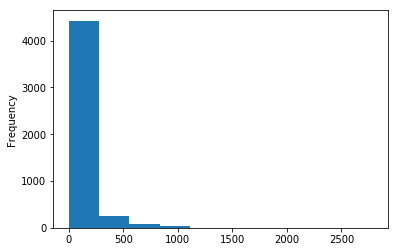

In [15]:
# đồ thị histogram 'revenue' (đơn vị: triệu $)
(data.revenue/1000000).plot(kind = 'hist')

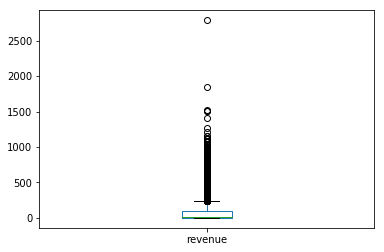

In [16]:
# đồ thị boxplot 'revenue' (đơn vị: triệu $)
(data.revenue/1000000).plot(kind = 'box')

In [17]:
data.revenue.skew() # chỉ số Skewness 'revenue'

4.444716447519764

In [18]:
data.revenue.kurtosis() # chỉ số Kurtosis 'revenue'

33.123629663045584

In [ ]:
Mô tả dữ liệu:
- Số quan sát: 4803 và không có missing value
- Doanh thu trung bình: $82.260.639
- Độ lệch chuẩn: $162.857.100
- Trung vị: $19.170.001
- Doanh thu nhỏ nhất: $0
- Doanh thu lớn nhất: $2.787.965.087 (phim Avatar)

Biểu đồ histogram:
- Biểu đồ histogram của 'revenue' có dạng phân phối lệch phải với phần lớn doanh thu nằm trong khoảng
$0M đến $500M và một số phim có doanh thu rất lớn so với các phim khác, đây là các outliers.
- Mẫu có phân phối lệch phải với Skewness = 4,44
- Mẫu có heavy tail với Kurtosis = 33,12

Biểu đồ boxplot
- Biểu đồ boxplot cho thấy mẫu có nhiều outliers (chấm tròn), đây là các phim có doanh thu cực lớn.
- Một quan sát được gọi là outlier khi có giá trị lớn hơn Q3 + 1,5*IQR hoặc nhỏ hơn Q1 - 1,5*IQR
- Để có cái nhìn chính xác hơn về dữ liệu cần phải tách các outlier ra để xem xét riêng như dưới đây.

In [19]:
# tiêu chuẩn đánh giá outlier
rev_outliers_crit = data.revenue.quantile(.75)+(data.revenue.quantile(.75) - data.revenue.quantile(.25))*1.5

In [20]:
# loại các quan sát outlier (sau đây gọi là tập 'phim phổ thông')
data_outlier_exc = data[data.revenue <= rev_outliers_crit]

In [21]:
# các quan sát outlier (sau đây gọi là tập 'phim bom tấn')
data_outlier = data[data.revenue > rev_outliers_crit]

In [ ]:
1.1. Revenue (loại các quan sát outliers) ('phim phổ thông')

In [22]:
# thống kê mô tả tập 'phim phổ thông'
data_outlier_exc.revenue.describe()

count         4,331.00
mean     39,725,205.14
std      55,394,940.32
min               0.00
25%               0.00
50%      12,342,632.00
75%      60,731,780.50
max     231,976,425.00
Name: revenue, dtype: float64

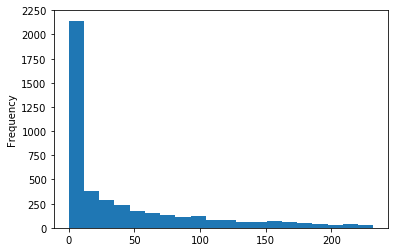

In [23]:
# đồ thị histogram tập 'phim phổ thông' (đơn vị: triệu $)
(data_outlier_exc.revenue/1000000).plot.hist(bins = 20)

In [24]:
data_outlier_exc.revenue.skew()

1.5502855242327507

In [25]:
data_outlier_exc.revenue.kurtosis()

1.5324523080978278

In [ ]:
Thống kê mô tả của dữ liệu 'phim phổ thông' như sau:
- Tổng số lượng quan sát: 4331
- Trung bình: $39.725.205
- Độ lệch chuẩn: $55.394.940
- Trung vị: $12.342.632
- Nhận xét: Sau khi loại outliers, mẫu quan sát có trung bình nhỏ hơn với độ phân tán thấp hơn.Trung vị
của mẫu cũng giảm xuống.
- Đồ thị histogram cho thấy phần lớn các phim có doanh thu nằm trong khoản $0M đến $100M
- Skewness và Kurtosis của mẫu sau khi loại outlier đều giảm mạnh so với ban đầu và gần với phân phối
chuẩn hơn. Cụ thể, Skewness là 1,55 và Kurtosis là 1,53

In [ ]:
1.2. Revenue (outliers) ('phim bom tấn')

In [26]:
# thống kê mô tả tập 'phim bom tấn'
data_outlier.revenue.describe()

count             472.00
mean      472,559,288.09
std       270,002,703.48
min       232,324,128.00
25%       294,174,722.00
50%       371,614,639.50
75%       565,563,524.25
max     2,787,965,087.00
Name: revenue, dtype: float64

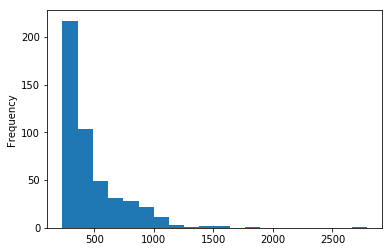

In [27]:
# đồ thị histogram tập 'phim bom tấn' (đơn vị: triệu $)
(data_outlier.revenue/1000000).plot.hist(bins = 20)

In [28]:
data_outlier.revenue.skew()

2.6834647961676494

In [29]:
data_outlier.revenue.kurtosis()

13.454887385408268

In [78]:
Các quan sát thuộc tập 'phim bom tấn' có thống kê mô tả như sau:
- Tổng số lượng quan sát: 472
- Trung bình: $472.559.288
- Độ lệch chuẩn: $270.002.703
- Trung vị: $371.614.639
- Phần lớn các phim có doanh thu từ $232M đến $565M, một số phim có doanh thu lớn hơn $565M
- Nhận xét: số liệu thống kê mô tả của hai tập dữ liệu con rất khác nhau cho thấy biến 'revenue'có thể
là phân phối bimodal
- Phân phối bimodal khi các quan sát không thuộc cùng một phân phối mà được rút ra từ hai phân phối
xác suất khác nhau thể hiện ở hai hàm một độ xác suất tách riêng nhau đáng kể.

In [ ]:
1.3. Revenue bimodal distribution

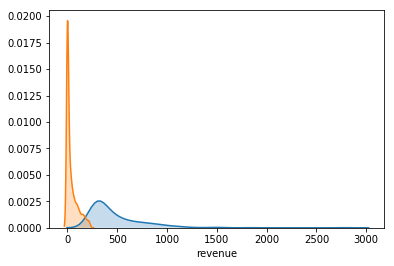

In [30]:
# hàm mật độ xác suất của tập 'phim phổ thông' (màu cam) và tập 'phim bom tấn' (màu xanh)
sns.distplot(data_outlier.revenue/1000000, hist = False, kde = True, kde_kws = {'shade':True})
sns.distplot(data_outlier_exc.revenue/1000000, hist = False, kde = True, kde_kws = {'shade':True})

In [ ]:
- Đồ thị density function cho thấy biến 'revenue' là một bimodal distribution với mẫu thuộc tập dữ liệu
data_outlier (màu xanh) là minor modal và mẫu thuộc tập dữ liệu data_outlier_exc (màu cam) là major
modal.

- Nhóm data_oulier là nhóm phim có doanh thu cực lớn và độ phân tán giữa doanh thu các phim trong nhóm
cao, trong phần phân tích sau ta sẽ gọi nhóm này là nhóm 'phim bom tấn'

- Nhóm data_outlier_exc là nhóm phim có doanh thu kém hơn nhóm 'phim bom tấn' và có độ tập trung cao,
các phim trong nhóm không có độ phân hóa lớn, trong phần phân tích sau ta sẽ gọi nhóm này là nhóm
'phim phổ thông'

- Nhận xét: từ kết luận trên, khi phân tích liên quan đến biến 'revenue' ta sử dụng ba tập dữ liệu là:
tập tổng thể, tập outlier và tập outlier_exc để lần lượt đánh giá ảnh hưởng đến từng tập.

In [ ]:
2. Thống kê mô tả 'production_countries'

In [ ]:
2.1. Xử lý dữ liệu

In [ ]:
- Một quan sát có từ 2 production countries trở lên thì 'revenue' của quan sát đó sẽ được ghi nhận cho tất cả các production
countries bằng cách thêm dòng vào dữ liệu.
Ví dụ: quan sát 1 có 'revenue' = 1000 và 'production_countries' = [US, UK] thì sẽ được tách thành 2 dòng với 'revenue' = 1000 và
'production_countries' lần lượt là US và UK.

In [31]:
# xử lý dữ liệu của tập tổng thể
data_2 = area_transformation(data)
# xử lý dữ liệu của tập 'phim phổ thông'
data_outlier_exc_2 = area_transformation(data_outlier_exc)
# xử lý dữ liệu của tập 'phim bom tấn'
data_outlier_2 = area_transformation(data_outlier)

In [ ]:
- Các dữ liệu sau khi được xử lý sẽ được nhóm theo 'production_countries'.
- Có một số quốc gia có số lượng phim trình chiếu rất ít, khi đưa các quốc gia này vào phân tích sẽ
không đảm bảo đủ yêu cầu về cỡ mẫu. Do đó, các quốc gia có số lượng phim chiếu dưới 150
sẽ được loại ra khỏi phân tích

In [32]:
# loại các nhóm có số lượng cỡ mẫu quá ít
data_2 = data_2.groupby('production_countries').filter(lambda x: len(x) > 150)
data_outlier_exc_2 = data_outlier_exc_2.groupby('production_countries').filter(lambda x: len(x) > 120)
data_outlier_2 = data_outlier_2.groupby('production_countries').filter(lambda x: len(x) > 30)

In [33]:
data_2_grouped = data_2.groupby('production_countries')
data_outlier_exc_2_grouped = data_outlier_exc_2.groupby('production_countries')
data_outlier_2_grouped = data_outlier_2.groupby('production_countries')

In [ ]:
3. ANOVA

In [ ]:
3.1. Thống kê mô tả của các nhóm

In [34]:
# Số lượng quan sát trong 3 tập dữ liệu theo production countries
a = data_2_grouped.revenue.count()
b = data_outlier_exc_2_grouped.revenue.count()
c = data_outlier_2_grouped.revenue.count()
pd.concat([a,b,c], axis = 1, sort = False, keys = ['Tổng thể','Phổ thông','Bom tấn'])

,Tổng thể,Phổ thông,Bom tấn
CA,261,244,nan
DE,324,299,nan
FR,306,296,nan
GB,636,568,68.00
US,3956,3495,461.00


In [ ]:
- Hoa Kỳ (US) có tham gia sản xuất 3956 phim trong đó có 3495 phim thuộc nhóm 'phim phổ thông' và 461
phim thuộc nhóm 'phim bom tấn'
- Anh (GB) cũng có 68 'phim bom tấn' và 568 'phim phổ thông'
- Ngoài Hoa Kỳ và Anh, các quốc gia khác có mặt trong dữ liệu là Canada (CA), Đức (DE) và Pháp (FR)

In [35]:
# doanh thu trung bình trong 3 tập dữ liệu theo production countries
a = data_2_grouped.revenue.mean()
b = data_outlier_exc_2_grouped.revenue.mean()
c = data_outlier_2_grouped.revenue.mean()
pd.concat([a,b,c], axis = 1, sort = False, keys = ['Tổng thể','Phổ thông','Bom tấn'])

,Tổng thể,Phổ thông,Bom tấn
CA,"57,434,160.42","33,562,831.69",nan
DE,"78,642,483.29","50,015,631.79",nan
FR,"46,365,765.72","35,737,237.25",nan
GB,"94,473,253.09","41,020,927.24","540,957,386.69"
US,"96,063,396.23","45,854,241.22","476,716,317.55"


In [ ]:
- Trong tập dữ liệu tổng thể:
    + US có doanh thu TB cao nhất ($96.063.396), kế tiếp là GB, DE, CA và FR
    + GB và US có doanh thu TB xấp xỉ nhau và cao hơn nhóm còn lại gồm CA, DE và FR
    
- Trong tập dữ liệu 'phim phổ thông':
    + DE có doanh thu TB cao nhất ($50.015.631), kế tiếp là US, GB, FR và CA
    + Doanh thu TB của các nhóm trong tập dữ liệu là xấp xỉ nhau

- Trong tập dữ liệu 'phim bom tấn':
    + Tập dữ liệu chỉ có hai quốc gia là GB và US
    + GB có doanh thu TB cao nhất $540.957.387 và US đứng thứ hai $476.716.317

In [36]:
# độ lệch chuẩn trong 3 tập dữ liệu theo production countries
a = data_2_grouped.revenue.std()
b = data_outlier_exc_2_grouped.revenue.std()
c = data_outlier_2_grouped.revenue.std()
pd.concat([a,b,c], axis = 1, sort = False, keys = ['Tổng thể','Phổ thông','Bom tấn'])

,Tổng thể,Phổ thông,Bom tấn
CA,"109,940,131.31","51,383,465.58",nan
DE,"122,676,631.50","61,515,920.70",nan
FR,"82,239,404.50","51,925,126.88",nan
GB,"201,450,365.23","56,082,619.59","362,574,430.69"
US,"175,096,691.99","57,856,480.15","271,677,288.00"


In [ ]:
- Độ lệch chuẩn trong tập 'phim phổ thông' tương đối nhỏ, điều này phù hợp với biểu đồ histogram ở
trên
- Độ lệch chuẩn trong tập 'phim bom tấn' rất lớn, biểu đồ histogram ở trên cũng cho thấy phân phối
lệch phải và có đuôi dài

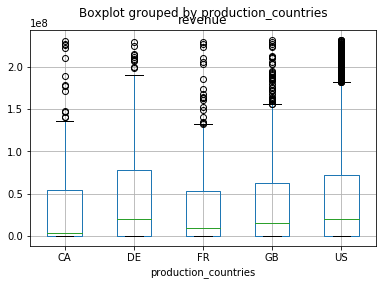

In [37]:
# biểu đồ boxplot cho tập 'phim phổ thông'
data_outlier_exc_2.boxplot('revenue', by = 'production_countries')

In [ ]:
- Trong tập dữ liệu 'phim phổ thông', DE và US là hai quốc gia có doanh thu TB lớn nhất đồng thời độ
phân tán cũng cao nhất

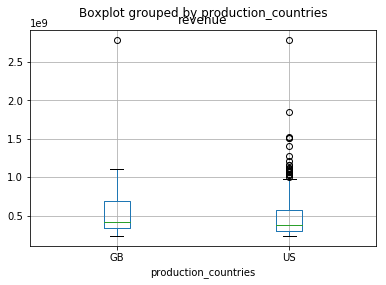

In [38]:
# biểu đồ boxplot cho tập 'phim bom tấn'
data_outlier_2.boxplot('revenue', by = 'production_countries')

In [ ]:
- Trong tập dữ liệu 'phim bom tấn', GB có doanh thu TB cao hơn US và độ phân tán cũng cao hơn
- Tuy nhiên, US có nhiều 'phim bom tấn' với doanh thu cực lớn hơn GB

In [ ]:
3.2. Kiểm định ANOVA

In [ ]:
Như đã đề cập ở trên, ta sẽ thực hiện phân tích one-way ANOVA lên ba tập dữ liệu: tổng thể,
'phim phổ thông' và 'phim bom tấn' và xem xét liệu ảnh hưởng của area lên revenue có khác nhau ở ba
tập dữ liệu này không

In [ ]:
a) Kiểm định ANOVA cho tập tổng thể

In [ ]:
Trước khi thực hiện kiểm định ANOVA ta cần kiểm định các yêu cầu của kiểm định ANOVA về:
    + Các quan sát là độc lập
    -> mỗi phim là một quan sát độc lập
    -> tuân thủ
    + Các quan sát có phân phối chuẩn
    -> thực hiện kiểm định K-S đối với từng nhóm
    + Các quan sát có độ lệch chuẩn bằng nhau
    -> độ lệch chuẩn trong nhóm tổng thể không đồng đều mà phân hóa thành 2 nhóm tương ứng với 2 tập
    dữ liệu con
    -> độ lệch chuẩn trong nhóm 'phim phổ thông' là xấp xỉ nhau
    -> độ lệch chuẩn trong nhóm 'phim bom tấn' có sự khác nhau
Từ các đánh giá trên, đề xuất thực hiện kiểm định ANOVA theo từng nhóm con mà không thực hiện cho
nhóm tổng thể vì nhóm tổng thể không đáp ứng giả định về sự đồng nhất phương sai.

In [ ]:
b) Kiểm định ANOVA cho tập 'phim phổ thông'

In [39]:
# thực hiện kiểm định K-S về giả thuyết phân phối chuẩn của nhóm 'CA'
stat, p_value = stats.normaltest(data_outlier_exc_2[data_outlier_exc_2.production_countries == 'CA'].revenue)
print('F statistic: %f' %stat)
print('p_value: %f' %p_value)

F statistic: 93.209838
p_value: 0.000000


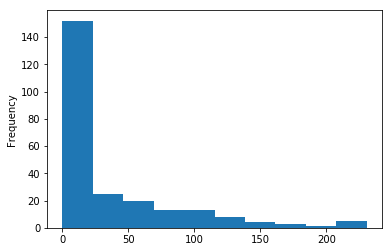

In [40]:
# đồ thị histogram của nhóm 'CA'
((data_outlier_exc_2[data_outlier_exc_2.production_countries == 'CA'].revenue)/1000000).plot(kind = 'hist')

In [41]:
# thực hiện kiểm định K-S về giả thuyết phân phối chuẩn của nhóm 'DE'
stat, p_value = stats.normaltest(data_outlier_exc_2[data_outlier_exc_2.production_countries == 'DE'].revenue)
print('F statistic: %f' %stat)
print('p_value: %f' %p_value)

F statistic: 50.476530
p_value: 0.000000


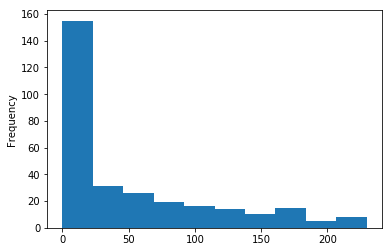

In [42]:
# đồ thị histogram của nhóm 'DE'
((data_outlier_exc_2[data_outlier_exc_2.production_countries == 'DE'].revenue)/1000000).plot(kind = 'hist')

In [43]:
# thực hiện kiểm định K-S về giả thuyết phân phối chuẩn của nhóm 'FR'
stat, p_value = stats.normaltest(data_outlier_exc_2[data_outlier_exc_2.production_countries == 'FR'].revenue)
print('F statistic: %f' %stat)
print('p_value: %f' %p_value)

F statistic: 95.553901
p_value: 0.000000


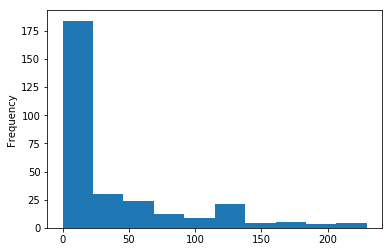

In [44]:
# đồ thị histogram của nhóm 'FR'
((data_outlier_exc_2[data_outlier_exc_2.production_countries == 'FR'].revenue)/1000000).plot(kind = 'hist')

In [45]:
# thực hiện kiểm định K-S về giả thuyết phân phối chuẩn của nhóm 'GB'
stat, p_value = stats.normaltest(data_outlier_exc_2[data_outlier_exc_2.production_countries == 'GB'].revenue)
print('F statistic: %f' %stat)
print('p_value: %f' %p_value)

F statistic: 147.461685
p_value: 0.000000


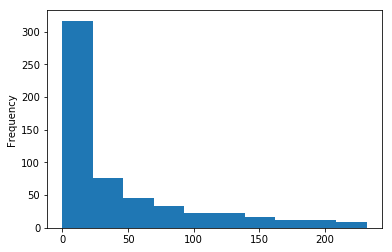

In [46]:
# đồ thị histogram của nhóm 'GB'
((data_outlier_exc_2[data_outlier_exc_2.production_countries == 'GB'].revenue)/1000000).plot(kind = 'hist')

In [47]:
# thực hiện kiểm định K-S về giả thuyết phân phối chuẩn của nhóm 'US'
stat, p_value = stats.normaltest(data_outlier_exc_2[data_outlier_exc_2.production_countries == 'US'].revenue)
print('F statistic: %f' %stat)
print('p_value: %f' %p_value)

F statistic: 691.067333
p_value: 0.000000


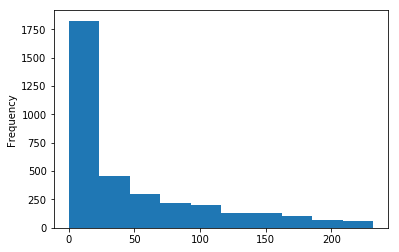

In [48]:
# đồ thị histogram của nhóm 'US'
((data_outlier_exc_2[data_outlier_exc_2.production_countries == 'US'].revenue)/1000000).plot(kind = 'hist')

In [ ]:
- Các kiểm định K-S về phân phối chuẩn của các nhóm đều có p_value rất nhỏ chứng tỏ chúng ta bác bỏ giả
thuyết Ho rằng các nhóm có phân phối chuẩn.
- Khi giả thuyết về phân phối chuẩn của dữ liệu bị vi phạm kiểm định ANOVA sẽ kém tin cậy.
- Theo đó, đề nghị thực hiện kiểm định ANOVA như một phương pháp tham khảo đồng thời thực hiện kiểm
định Mann-Whitney với nhóm DE - US và nhóm DE, US v.s. non-DE, US.

In [49]:
# Kiểm định ANOVA cho nhóm 'phim phổ thông'
data_ANOVA = ANOVA_parsing(*data_outlier_exc_2_grouped.revenue)
stat, p_value = stats.f_oneway(*data_ANOVA)
print('F statistic: %f' %stat)
print('p_value: %f' %p_value)

F statistic: 5.657993
p_value: 0.000153


In [ ]:
- Kiểm định ANOVA cho kết quả phân phối F là 5,66 và p_value là 0,000153
- Với mức ý nghĩa 5%, với p_value = 0,000153 chúng ta bác bỏ giả huyết Ho về việc doanh thu trung bình
của các nhóm trong tập tổng thể là bằng nhau.

In [50]:
# kiểm định Mann-Whitney cho nhóm DE-US
DE = data_outlier_exc_2[data_outlier_exc_2.production_countries == 'DE'].revenue
US = data_outlier_exc_2[data_outlier_exc_2.production_countries == 'US'].revenue
stat, p_value = stats.mannwhitneyu(DE, US)
print('F statistic: %f' %stat)
print('p_value: %f' %p_value)

F statistic: 511547.500000
p_value: 0.271360


In [ ]:
- Với mức ý nghĩa 5%, với p_value = 0,27136 chúng ta không có cơ sở bác bỏ giả thuyết Ho về việc doanh
thu trung bình của DE và US bằng nhau.

In [51]:
# kiểm định Mann-Whitney cho nhóm DE,US v.s. non-DE,US
DEUS = data_outlier_exc_2[data_outlier_exc_2.production_countries.isin(['DE', 'US'])].revenue
CAFRGB = data_outlier_exc_2[data_outlier_exc_2.production_countries.isin(['CA', 'FR', 'GB'])].revenue
stat, p_value = stats.mannwhitneyu(DEUS, CAFRGB)
print('F statistic: %f' %stat)
print('p_value: %f' %p_value)

F statistic: 1899292.000000
p_value: 0.000000


In [ ]:
- Với mức ý nghĩa 5%, với p_value = 0,00 chúng ta bác bỏ giả thuyết Ho về việc doanh thu trung bình
giữa hai nhóm là bằng nhau.

In [ ]:
c) Kiểm định ANOVA cho tập 'phim bom tấn'

In [52]:
# thực hiện kiểm định K-S về giả thuyết phân phối chuẩn của nhóm 'US'
stat, p_value = stats.normaltest(data_outlier_2[data_outlier_2.production_countries == 'US'].revenue)
print('F statistic: %f' %stat)
print('p_value: %f' %p_value)

F statistic: 301.275332
p_value: 0.000000


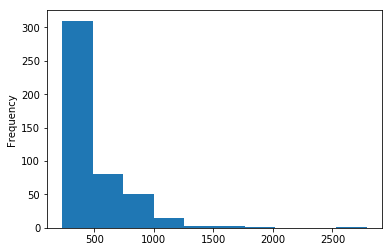

In [53]:
# đồ thị histogram của nhóm 'US'
(data_outlier_2[data_outlier_2.production_countries == 'US'].revenue/1000000).plot(kind = 'hist')

In [54]:
# thực hiện kiểm định K-S về giả thuyết phân phối chuẩn của nhóm 'GB'
stat, p_value = stats.normaltest(data_outlier_2[data_outlier_2.production_countries == 'GB'].revenue)
print('F statistic: %f' %stat)
print('p_value: %f' %p_value)

F statistic: 86.328708
p_value: 0.000000


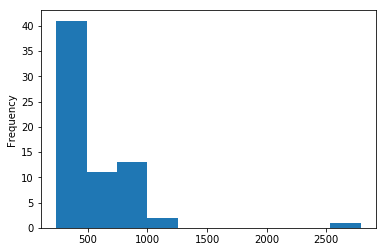

In [55]:
# đồ thị histogram của nhóm 'GB'
(data_outlier_2[data_outlier_2.production_countries == 'GB'].revenue/1000000).plot(kind = 'hist')

In [ ]:
Cũng giống như nhóm 'phim phổ thông', giả thuyết phân phối chuẩn của dữ liệu trong nhóm 'phim bom tấn'
không đáp ứng. Do đó, đề nghị thực hiện kiểm định ANOVA như một tham khảo đồng thời với kiểm định
Mann-Whitney

In [56]:
# Kiểm định ANOVA cho nhóm 'phim bom tấn'
data_ANOVA = ANOVA_parsing(*data_outlier_2_grouped.revenue)
stat, p_value = stats.f_oneway(*data_ANOVA)
print('F statistic: %f' %stat)
print('p_value: %f' %p_value)

F statistic: 3.014081
p_value: 0.083129


In [ ]:
- Kiểm định ANOVA cho kết quả phân phối F là 3,01 và p_value là 0,083
- Với mức ý nghĩa 5%, với p_value = 0,083 chúng ta không đủ cơ sở để bác bỏ giả thuyết Ho về doanh thu
trung bình của các nhóm là bằng nhau. Như vậy trong nhóm 'phim bom tấn' doanh thu trung bình giữa GB
và US không khác nhau một cách có ý nghĩa thống kê.

In [57]:
# kiểm định Mann-Whitney cho nhóm GB-US
GB = data_outlier_2[data_outlier_2.production_countries == 'GB'].revenue
US = data_outlier_2[data_outlier_2.production_countries == 'US'].revenue
stat, p_value = stats.mannwhitneyu(GB, US)
print('F statistic: %f' %stat)
print('p_value: %f' %p_value)

F statistic: 13562.500000
p_value: 0.036402


In [ ]:
- Với mức ý nghĩa 5%, với p_value = 0,036 chúng ta bác bỏ giả thuyết Ho về doanh thu trung bình của các
nhóm là bằng nhau.
- Như vậy kiểm định Mann-Whitney cho kết quả ngược lại với kiểm định ANOVA
- Kiểm định Mann-Whitney là kiểm định phi tham số, phù hợp hơn với mẫu không đáp ứng yêu cầu phân phối
chuẩn nên ta sẽ kết luận theo kiểm định Mann-Whitney.

In [ ]:
3.3. Kết luận câu 1
- Doanh thu trung bình của các phim chia thành hai nhóm là nhóm 'phim phổ thông' với doanh thu phổ biến
trong mức từ $0M đến$231M và nhóm 'phim bom tấn' với doanh thu từ $232M đến $2783M. Các 'phim bom tấn'
chủ yếu được sản xuất tại Hoa Kỳ (US) và Anh (GB) .
- Trong nhóm 'phim phổ thông', các phim sản xuất tại Đức (DE) hoặc Hoa Kỳ (US) có doanh thu trung bình
cao hơn với các phim sản xuất ở các nước còn lại.
- Trong nhóm 'phim bom tấn', các phim sản xuất tại Anh (GB) có doanh thu trung bình cao hơn sản xuất
tại Hoa Kỳ (US).

In [ ]:
II. Ảnh hưởng của 'genres' đến 'revenue' và 'vota_average' (câu 2)

In [ ]:
1. Thống kê mô tả 'vota_average'

In [58]:
# thống kê mô tả 'vote_average'
data.vote_average.describe()

count   4,803.00
mean        6.09
std         1.19
min         0.00
25%         5.60
50%         6.20
75%         6.80
max        10.00
Name: vote_average, dtype: float64

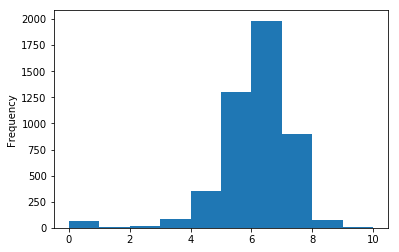

In [59]:
# đồ thị histogram 'vote_average'
data.vote_average.plot(kind = 'hist')

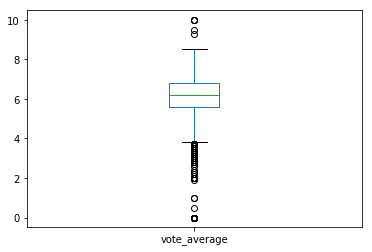

In [60]:
# đồ thị boxplot 'vote_average'
data.vote_average.plot(kind = 'box')

In [61]:
# hệ số tương quan giữa 'revenue' và 'vote_average'
data.loc[:,['revenue','vote_average']].corr()

,revenue,vote_average
revenue,1.00,0.20
vote_average,0.20,1.00


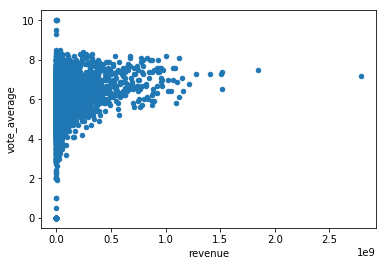

In [62]:
# đồ thị scatter giữa 'revenue' và 'vote_average'
data.plot('revenue', 'vote_average', kind = 'scatter')

In [ ]:
Thống kê mô tả 'vote_average'
- Số lượng quan sát: 4803
- Trung bình: 6,09
- Độ lệch chuẩn: 1,19
- Trung vị: 6,20
- Đồ thị histogram có dạng phân phối chuẩn

Tương quan giữa 'revenue' và 'vote_average':
- Hệ số tương quan giữa hai biến là tương đối thấp, đạt 0,20
- Đồ thị scatter cũng không cho thấy tương quan rõ ràng nào giữa 2 biến

In [ ]:
2. Xử lý dữ liệu

In [ ]:
- Một quan sát có từ 2 'genres' trở lên thì 'revenue' và 'vote_average' sẽ được ghi nhận cho tất cả
các 'genres' bằng cách thêm dòng vào dữ liệu như cách xử lý 'revenue' theo 'production_countries' ở
trên.
- Ngoài ra, thực tế các phim đều thuộc một lúc nhiều thể loại. Do đó, chúng ta còn phân tích theo nhóm
thể loại.
Ví dụ: một phim vừa thuộc 'genres' Romance và Comedy sẽ được xếp vào nhóm ['Romance', 'Comedy']
- Các dữ liệu sau khi được xử lý sẽ được nhóm lại theo 'genres'.
- Có một số thể loại có số lượng phim trình chiếu rất ít, khi đưa các thể loại này vào phân tích sẽ
không đảm bảo đủ yêu cầu về cỡ mẫu. Do đó, các thể loại có số lượng phim chiếu dưới 100 sẽ được loại
ra khỏi phân tích. Riêng nhóm thể loại có số lượng phim dưới 50 sẽ bị loại

In [63]:
data_3 = genres_transformation(data)

In [64]:
data_3 = data_3.groupby('genres').filter(lambda x: len(x) > 100)

In [65]:
data_3_grouped = data_3.groupby('genres')

In [66]:
data_genstr = data.copy()

In [67]:
data_genstr['genres'] = data_genstr['genres'].apply(str)

In [68]:
data_genstr = data_genstr.groupby('genres').filter(lambda x: len(x) > 50)

In [69]:
data_genstr_grouped = data_genstr.groupby('genres')

In [70]:
# Thống kê mô tả 'revenue' theo thể loại
data_3_grouped.revenue.describe().sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Animation,234.00,"225,693,025.06","262,978,335.82",0.00,"7,772,228.50","120,450,950.00","353,130,933.00","1,274,219,009.00"
Adventure,790.00,"208,660,204.49","284,606,640.99",0.00,"17,233,641.50","95,939,403.50","300,225,567.50","2,787,965,087.00"
Fantasy,424.00,"193,354,245.11","283,225,087.63",0.00,"11,455,054.75","89,477,332.00","245,551,323.75","2,787,965,087.00"
Family,513.00,"162,345,494.52","233,596,609.82",0.00,0.00,"64,459,316.00","201,584,141.00","1,274,219,009.00"
Science Fiction,535.00,"152,456,515.41","261,311,885.03",0.00,"4,153,736.50","50,244,700.00","175,953,911.00","2,787,965,087.00"
Action,"1,154.00","141,213,097.50","230,810,642.18",0.00,"5,740,748.00","54,550,709.50","169,766,335.50","2,787,965,087.00"
War,144.00,"84,155,874.38","117,761,062.03",0.00,"6,293,966.25","28,188,328.00","112,558,968.25","542,307,423.00"
Thriller,"1,274.00","81,044,290.64","143,634,982.52",0.00,17.75,"28,965,700.50","96,981,862.50","1,845,034,188.00"
Mystery,348.00,"78,300,927.47","124,762,706.31",0.00,"423,164.75","28,560,550.00","100,766,243.00","938,212,738.00"


In [ ]:
Thống kê mô tả 'revenue' theo thể loại:
- Thể loại có nhiều phim nhất là Drama và ít phim nhất là Documentary
- Thể loại có doanh thu trung bình cao nhất là Animation và thấp nhất là Documentary
- Thể loại có độ lệch chuẩn doanh thu cao nhất là Adventure và thấp nhất là Documentary

In [71]:
# Thống kê mô tả 'vote_average' theo thể loại
data_3_grouped.vote_average.describe().sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
History,197.00,6.72,0.74,3.90,6.30,6.70,7.20,9.30
War,144.00,6.71,0.82,3.00,6.20,6.75,7.23,8.30
Drama,"2,297.00",6.39,1.06,0.00,5.90,6.50,7.00,10.00
Music,185.00,6.36,1.05,0.00,6.00,6.50,7.00,8.00
Animation,234.00,6.34,1.01,0.50,5.80,6.50,6.97,8.30
Crime,696.00,6.27,1.00,0.00,5.80,6.30,6.90,8.50
Documentary,110.00,6.24,1.93,0.00,5.90,6.80,7.30,8.30
Romance,894.00,6.21,0.95,0.00,5.70,6.30,6.80,10.00
Mystery,348.00,6.18,1.05,0.00,5.80,6.30,6.80,8.10


In [ ]:
Thống kê mô tả 'vote_average' theo thể loại:
- Thể loại có điểm số trung bình cao nhất là History và thấp nhất là Horror
- Thể loại có độ lệch chuẩn cao nhất là Documentary và thấp nhất là History

In [72]:
# Thống kê mô tả 'revenue' theo nhóm thể loại
data_genstr_grouped.revenue.describe().sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
"['Action', 'Adventure', 'Science Fiction']",53.00,"483,316,452.96","392,325,264.79",0.00,"167,977,596.00","389,681,935.00","769,653,595.00","1,519,557,910.00"
"['Action', 'Adventure', 'Thriller']",51.00,"223,083,424.00","211,938,665.57",0.00,"89,773,246.50","161,777,836.00","295,010,902.50","1,108,561,013.00"
"['Action', 'Crime', 'Drama', 'Thriller']",51.00,"85,372,167.24","203,286,259.35",0.00,"4,621,311.50","19,412,993.00","75,614,695.50","1,084,939,099.00"
"['Action', 'Crime', 'Thriller']",59.00,"81,966,961.24","109,293,855.37",0.00,"10,059,575.00","43,928,932.00","103,840,053.00","626,137,675.00"
"['Comedy', 'Romance']",164.00,"71,670,526.95","110,721,482.78",0.00,0.00,"17,206,130.50","97,844,627.50","609,841,637.00"
['Comedy'],282.00,"57,070,029.12","72,614,495.22",0.00,0.00,"27,850,000.00","90,543,123.25","459,270,619.00"
"['Crime', 'Drama', 'Thriller']",92.00,"54,701,696.18","70,082,708.95",0.00,0.00,"28,210,141.50","73,799,471.50","289,847,354.00"
"['Comedy', 'Drama', 'Romance']",182.00,"49,249,638.64","93,221,071.19",0.00,0.00,"10,256,658.00","50,340,366.75","677,945,399.00"
"['Crime', 'Drama']",59.00,"40,731,113.83","72,324,222.07",0.00,"1,665.00","11,540,607.00","45,342,231.50","352,114,312.00"


In [ ]:
Thống kê mô tả 'revenue' theo nhóm thể loại:
- Nhóm thể loại có nhiều phim nhất là ['Drama'] và ít phim nhất là ['Action', 'Crime', 'Drama', 'Thriller']
- Nhóm thể loại có doanh thu TB cao nhất là ['Action', 'Adventure', 'Science Fiction'] và thấp nhất là
['Documentary']
- Nhóm thể loại có độ lệch chuẩn cao nhất là ['Action', 'Adventure', 'Science Fiction'] và thấp nhất là
['Documentary']

In [73]:
# Thống kê mô tả 'vote_average' theo nhóm thể loại
data_genstr_grouped.vote_average.describe().sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
"['Crime', 'Drama']",59.00,6.65,1.81,0.00,6.60,6.90,7.60,8.50
"['Drama', 'Romance']",185.00,6.63,0.78,3.40,6.20,6.70,7.20,8.00
['Drama'],370.00,6.44,1.30,0.00,6.10,6.70,7.18,8.30
"['Crime', 'Drama', 'Thriller']",92.00,6.42,1.02,0.00,6.00,6.50,7.00,8.10
"['Comedy', 'Drama']",188.00,6.32,1.09,0.00,6.00,6.40,7.00,8.50
"['Action', 'Adventure', 'Science Fiction']",53.00,6.32,1.12,3.10,5.80,6.60,7.10,8.20
"['Action', 'Crime', 'Drama', 'Thriller']",51.00,6.28,0.75,4.50,5.95,6.10,6.70,8.20
"['Comedy', 'Drama', 'Romance']",182.00,6.23,0.90,0.00,5.80,6.20,6.70,10.00
"['Action', 'Crime', 'Thriller']",59.00,6.14,0.73,4.10,5.80,6.20,6.60,7.60


In [ ]:
Thống kê mô tả 'vote_average' theo nhóm thể loại:
- Nhóm thể loại có điểm số TB cao nhất là ['Crime', 'Drama'] và thấp nhất là ['Horror']
- Nhóm thể loại có độ lệch chuẩn cao nhất là ['Documentary'] và thấp nhất là ['Action', 'Crime', 'Thriller']

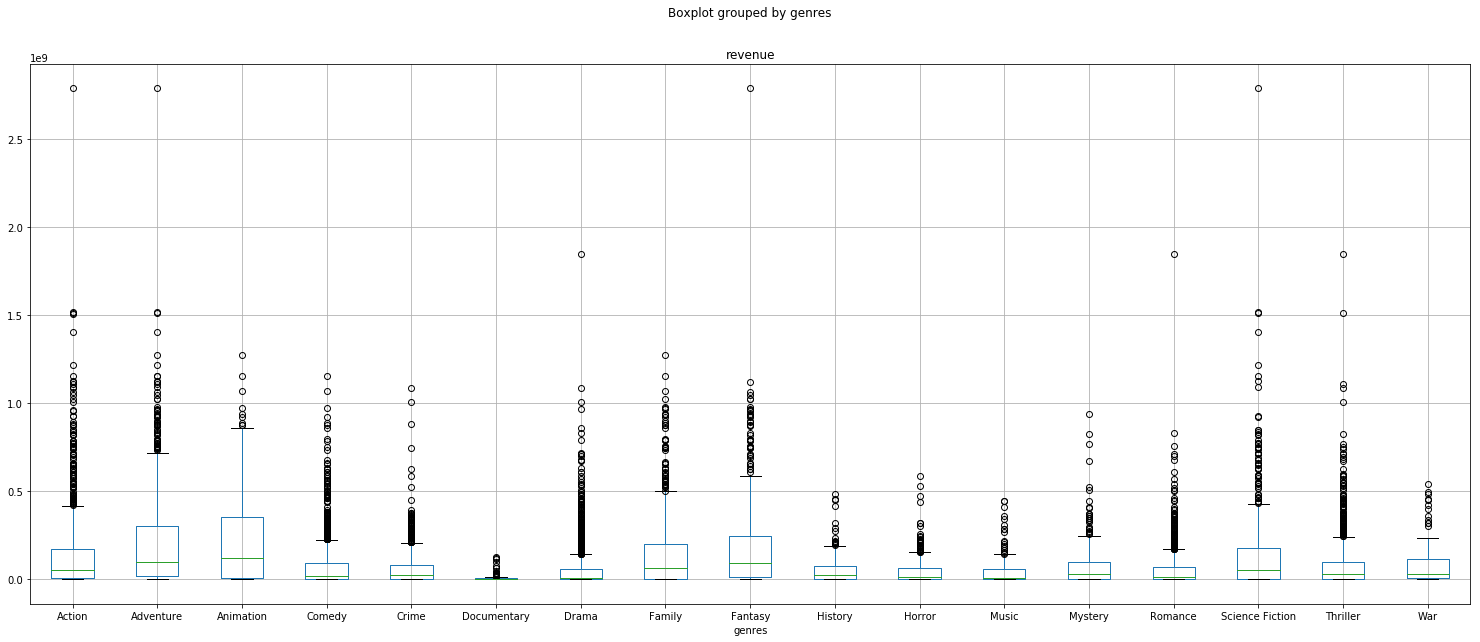

In [74]:
# đồ thị boxplot 'revenue' theo thể loại
data_3.boxplot('revenue', by = 'genres', figsize = (25,10))

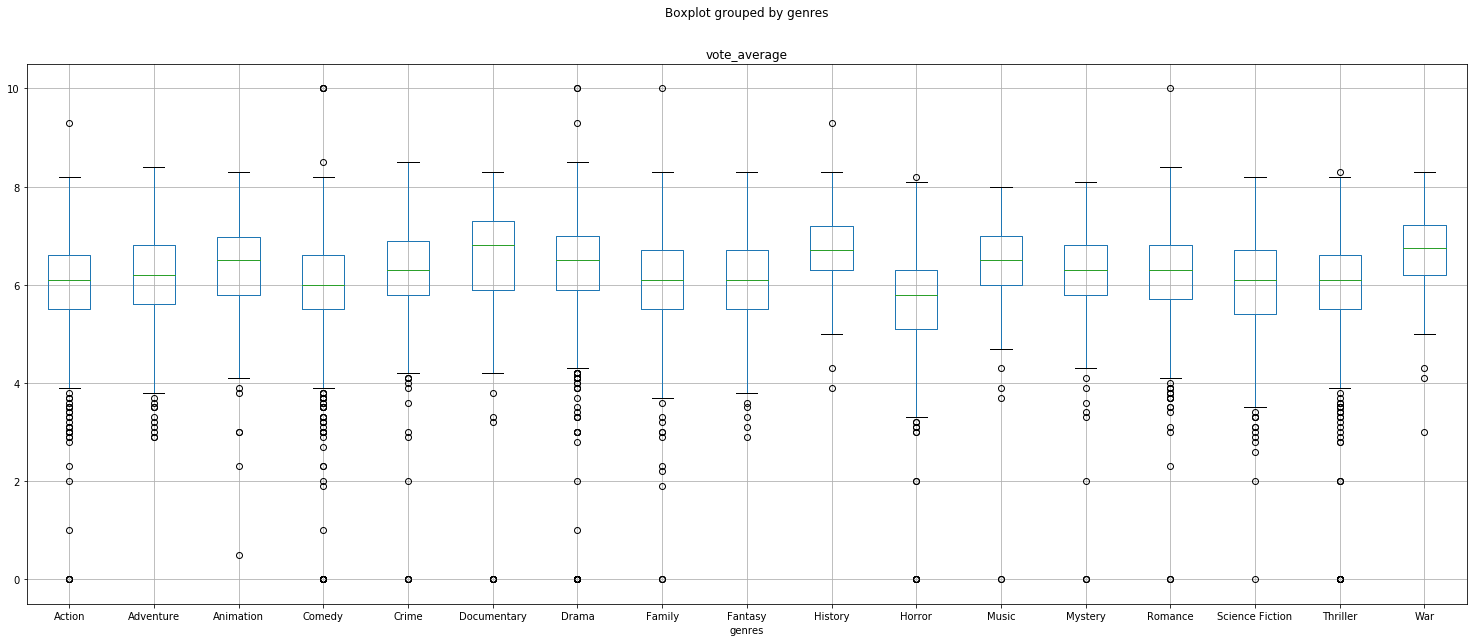

In [75]:
# đồ thị boxplot 'vote_average' theo thể loại
data_3.boxplot('vote_average', by = 'genres', figsize = (25,10))

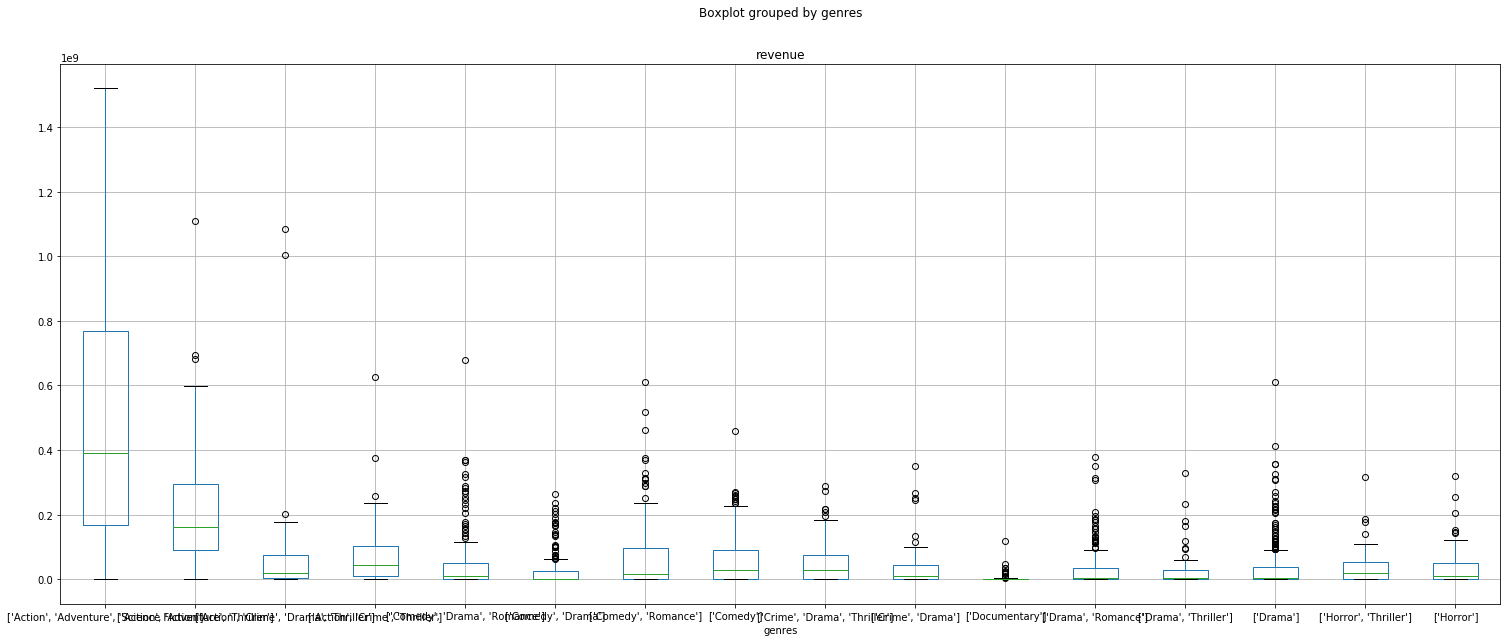

In [76]:
# đồ thị boxplot 'revenue' theo nhóm thể loại
data_genstr.boxplot('revenue', by = 'genres', figsize = (25,10))

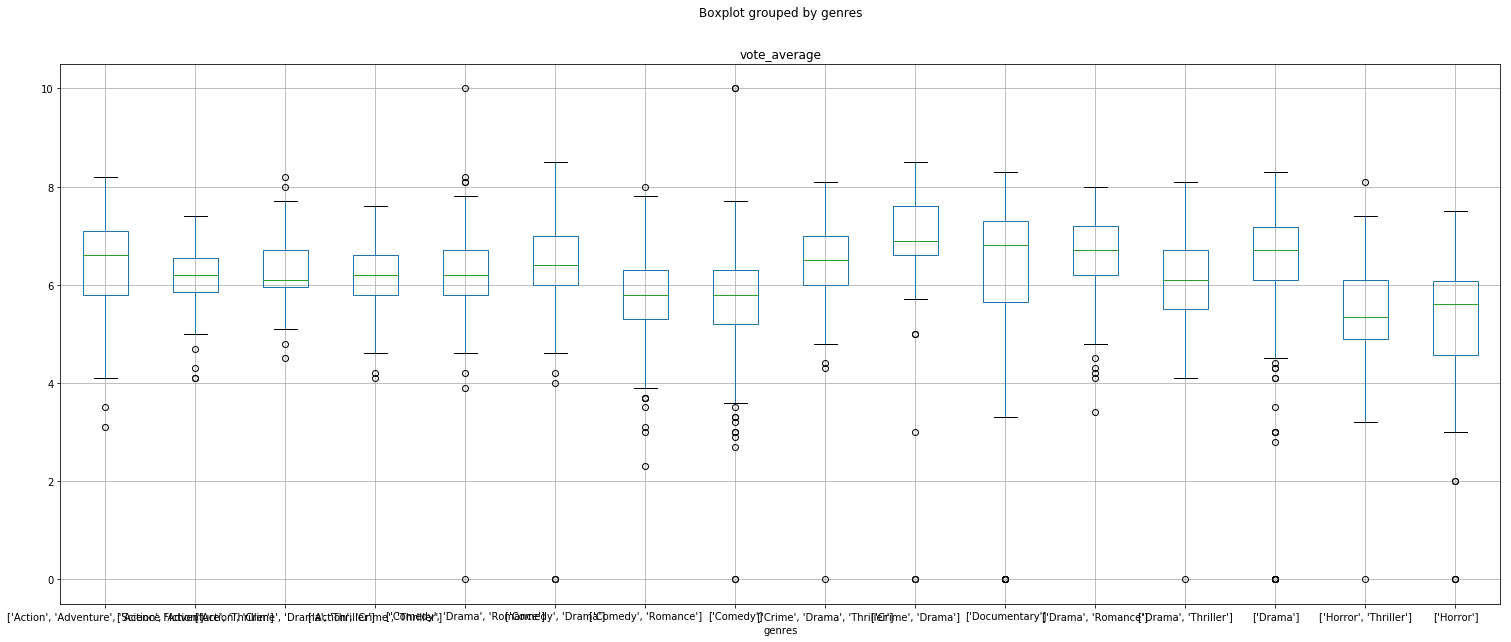

In [77]:
# đồ thị boxplot 'vote_average' theo nhóm thể loại
data_genstr.boxplot('vote_average', by = 'genres', figsize = (25,10))

In [ ]:
3. Kiểm định ANOVA

In [78]:
# Kiểm định ANOVA cho 'revenue' theo thể loại phim
data_ANOVA = ANOVA_parsing(*data_3_grouped.revenue)
stat, p_value = stats.f_oneway(*data_ANOVA)
print('F statistic: %f' %stat)
print('p_value: %f' %p_value)

F statistic: 73.834190
p_value: 0.000000


In [ ]:
- Với mức ý nghĩa 5% và p_value = 0,00, ta bác bỏ giả thuyết Ho về doanh thu trung bình các thể loại
bằng nhau
- Thống kê mô tả cho thấy các phim thuộc thể loại Animation, Advanture, Fantasy, Family, Science
Fiction và Action có doanh thu TB cao hơn các thể loại phim còn lại. Đây là các thể loại phim phù hợp
với nhiều đối tượng khán giả. Ta đặt giả thuyết phim thuộc các thể loại này (high_group) có doanh thu
cao hơn phim thuộc các thể loại khác (low_group).
- Ta thực hiện kiểm định Mann-Whitney với hai nhóm này để kiểm định giả thuyết trên

In [79]:
# kiểm định Mann-Whitney cho nhóm Animation, Advanture,..., Action và các thể loại còn lại
high_group = data_3[data_3['genres'].isin(['Animation', 'Advanture', 'Fantasy', 'Family', 'Science Fiction', 'Action'])].revenue
low_group = data_3[~(data_3['genres'].isin(['Animation', 'Advanture', 'Fantasy', 'Family', 'Science Fiction', 'Action']))].revenue
stat, p_value = stats.mannwhitneyu(high_group, low_group)
print('F statistic: %f' %stat)
print('p_value: %f' %p_value)

F statistic: 9955843.000000
p_value: 0.000000


In [ ]:
- Với mức ý nghĩa 5% và p_value = 0,00, ta bác bỏ giả thuyết Ho về doanh thu trung bình các thể loại
bằng nhau
- Các phim thuộc nhóm Animation, Advanture, Fantasy, Family, Science Fiction và Action có doanh thu cao
hơn các phim thuộc thể loại còn lại.

In [80]:
# Kiểm định ANOVA cho 'revenue' theo nhóm thể loại phim
data_ANOVA = ANOVA_parsing(*data_genstr_grouped.revenue)
stat, p_value = stats.f_oneway(*data_ANOVA)
print('F statistic: %f' %stat)
print('p_value: %f' %p_value)

F statistic: 71.185115
p_value: 0.000000


In [ ]:
- Với mức ý nghĩa 5% và p_value = 0,00, ta bác bỏ giả thuyết Ho về doanh thu trung bình các thể loại
bằng nhau
- Thống kê mô tả cho thấy các phim thuộc thể loại ['Action', 'Adventure', 'Science Fiction'] có doanh
thu TB vượt trội, kế đến là nhóm ['Action', 'Adventure', 'Thriller'] đứng thứ hai và các phim thuộc các
nhóm thể loại còn lại có doanh thu TB nhỏ hơn.
- Ta đặt giả thuyết phim thuộc thể loại ['Action', 'Adventure', 'Science Fiction'] có doanh thu cao hơn
phim thuộc thể loại ['Action', 'Adventure', 'Thriller']
- Ta đặt giả thuyết phim thuộc thể loại ['Action', 'Adventure', 'Thriller'] có doanh thu cao hơn các
thể loại phim còn lại
- Ta thực hiện kiểm định Mann-Whitney với hai giả thuyết trên.

In [81]:
# kiểm định Mann-Whitney với nhóm ['Action', 'Adventure', 'Science Fiction'] và ['Action', 'Adventure', 'Thriller']
high_group = data_genstr[data_genstr['genres'] == "['Action', 'Adventure', 'Science Fiction']"].revenue
mid_group = data_genstr[data_genstr['genres'] == "['Action', 'Adventure', 'Thriller']"].revenue
stat, p_value = stats.mannwhitneyu(high_group, mid_group)
print('F statistic: %f' %stat)
print('p_value: %f' %p_value)

F statistic: 810.000000
p_value: 0.000217


In [ ]:
- Với mức ý nghĩa 5% và p_value = 0,0002, ta bác bỏ giả thuyết Ho về doanh thu trung bình các thể loại
bằng nhau.
- Ta chấp nhận giả thuyết phim thuộc thể loại ['Action', 'Adventure', 'Science Fiction'] có doanh thu
cao hơn phim thuộc thể loại ['Action', 'Adventure', 'Thriller']

In [82]:
# kiểm định Mann-Whitney giữa nhóm ['Action', 'Adventure', 'Thriller'] và các nhóm thể loại còn lại
low_group = data_genstr[~((data_genstr['genres'] == "['Action', 'Adventure', 'Science Fiction']") & (data_genstr['genres'] == "['Action', 'Adventure', 'Thriller']"))].revenue
stat, p_value = stats.mannwhitneyu(mid_group, low_group)
print('F statistic: %f' %stat)
print('p_value: %f' %p_value)

F statistic: 17342.500000
p_value: 0.000000


In [ ]:
- Với mức ý nghĩa 5% và p_value = 0,0002, ta bác bỏ giả thuyết Ho về doanh thu trung bình các thể loại
bằng nhau.
- Ta chấp nhận giả thuyết phim thuộc thể loại ['Action', 'Adventure', 'Thriller'] có doanh thu cao hơn
phim thuộc các nhóm thể loại còn lại.

In [83]:
# Kiểm định ANOVA cho nhóm 'vote_average' theo thể loại phim
data_ANOVA = ANOVA_parsing(*data_3_grouped.vote_average)
stat, p_value = stats.f_oneway(*data_ANOVA)
print('F statistic: %f' %stat)
print('p_value: %f' %p_value)

F statistic: 32.664813
p_value: 0.000000


In [ ]:
- Với mức ý nghĩa 5% và p_value = 0,0002, ta bác bỏ giả thuyết Ho về điểm số trung bình các thể loại
bằng nhau.
- Mô tả thống kê cho thấy các phim thuộc thể loại History và War có điểm số trung bình cao hơn các phim
thuộc các thể loại còn lại
- Ta thực hiện kiểm định Mann-Whitney với giả thuyết trên.

In [84]:
# kiểm định Mann-Whitney giữa nhóm History, War và các thể loại còn lại
high_group = data_3[data_3['genres'].isin(['History', 'War'])].vote_average
low_group = data_3[~(data_3['genres'].isin(['History', 'War']))].vote_average
stat, p_value = stats.mannwhitneyu(high_group, low_group)
print('F statistic: %f' %stat)
print('p_value: %f' %p_value)

F statistic: 1253262.500000
p_value: 0.000000


In [ ]:
- Với mức ý nghĩa 5% và p_value = 0,00, ta bác bỏ giả thuyết Ho về điểm số trung bình các thể loại
bằng nhau. 

In [85]:
# Kiểm định ANOVA cho 'vote_average' theo nhóm thể loại phim
data_ANOVA = ANOVA_parsing(*data_genstr_grouped.vote_average)
stat, p_value = stats.f_oneway(*data_ANOVA)
print('F statistic: %f' %stat)
print('p_value: %f' %p_value)

F statistic: 15.851674
p_value: 0.000000


In [ ]:
- Với mức ý nghĩa 5% và p_value = 0,00, ta bác bỏ giả thuyết Ho về điểm số trung bình các thể loại
bằng nhau.
- Mô tả thống kê cho thấy các phim thuộc nhóm thể loại ['Crime', 'Drama'] có điểm số TB cao nhất. Ta
thực hiện kiểm định Mann-Whitney đối với giả thuyết nhóm thể loại ['Crime', 'Drama'] có điểm số TB cao
hơn các nhóm còn lại
- Thể loại History và War không xuất hiện trong phân tích theo nhóm thể loại vì các nhóm thể loại có
History và War không đủ số lượng mẫu để đưa vào phân tích.

In [86]:
# kiểm định Mann-Whitney giữa nhóm ['Crime', 'Drama'] và các thể loại còn lại
high_group = data_genstr[data_genstr['genres'] == "['Crime', 'Drama']"].vote_average
low_group = data_genstr[~(data_genstr['genres'] == "['Crime', 'Drama']")].vote_average
stat, p_value = stats.mannwhitneyu(high_group, low_group)
print('F statistic: %f' %stat)
print('p_value: %f' %p_value)

F statistic: 32794.000000
p_value: 0.000000


In [ ]:
- Với mức ý nghĩa 5% và p_value = 0,00, ta bác bỏ giả thuyết Ho về điểm số trung bình các thể loại
bằng nhau.

In [ ]:
4. Kết luận
- Thể loại phim có ảnh hưởng đến doanh thu trung bình của phim, cụ thể:
    + Các phim thuộc thể loại Animation, Advanture, Fantasy, Family, Science Fiction và Action có doanh
    thu TB cao hơn các phim thuộc thể loại còn lại.
    + Trong đó, các phim đồng thời có các thể loại ['Action', 'Adventure', 'Science Fiction'] có doanh
    thu TB vượt trội, kế đến là các phim có nhóm thể loại là ['Action', 'Adventure', 'Thriller'] và hai
    nhóm này có doanh thu cao hơn các phim thuộc các nhóm thể loại còn lại.
    
- Thể loại phim có ảnh hưởng đến điểm số trung bình của phim, cụ thể:
    + Các phim thuộc thể loại History và War có điểm số trung bình cao hơn các phim thuộc các thể loại
    còn lại
    
- Mối tương quan giữa doanh thu và điểm số của phim là không đáng kể

In [ ]:
III. Ảnh hưởng của 'release_date' đến 'revenue' (câu 3)

In [ ]:
1. Xử lý dữ liệu

In [87]:
# parse 'release_date' từ str qua datetime
release_date = pd.to_datetime(data.release_date, format = '%Y-%m-%d')

In [88]:
# tạo một series tháng
month = pd.DatetimeIndex(release_date).month

In [91]:
revenue_date = pd.DataFrame({'month':month, 'revenue':data.revenue})

In [92]:
revenue_date.index = release_date

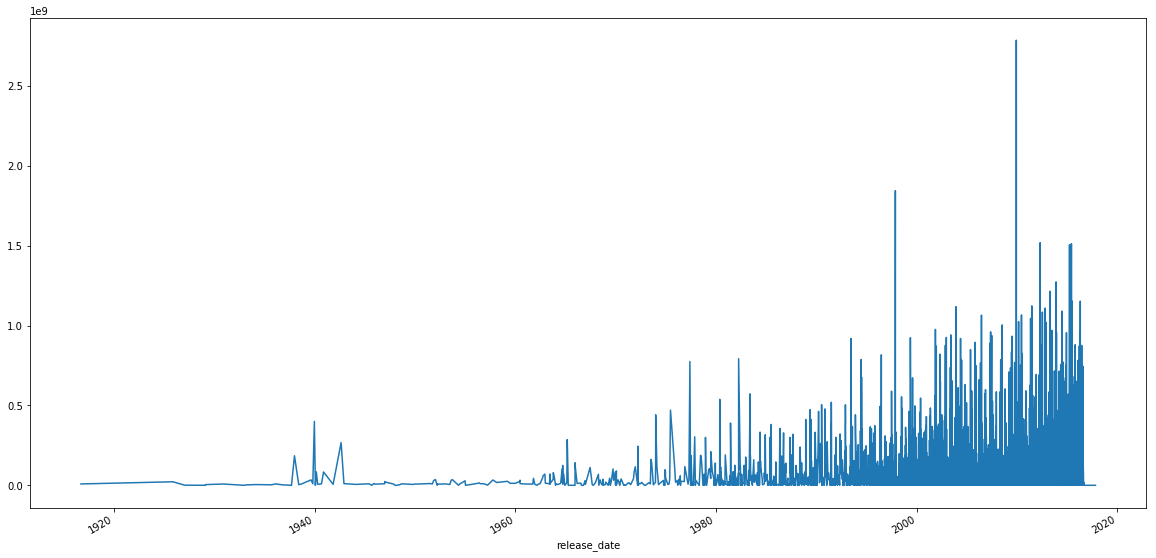

In [93]:
# đồ thị doanh thu theo thời gian
revenue_date.revenue.plot(figsize = (20,10))

In [ ]:
- Đồ thị doanh thu theo thời gian cho thấy doanh thu có xu hướng tăng dần đều qua các năm từ năm 1920 trở lại đây.
- Từ năm 1920 đến năm 1980, có rất nhiều phim có doanh thu được ghi nhận là 0
- Giai đoạn 2000 - 2018 doanh thu phim tăng rất nhanh so với giai đoạn 1980 - 2000
- Chúng ta muốn đánh giá ảnh hưởng của tháng phát hành đến doanh thu nên chúng ta phải chọn một quãng thời gian có mặt bằng giá
tương đối ổn định để loại những ảnh hưởng tăng doanh thu do mặt bằng giá thay đổi.
- Do đó, chúng ta sẽ giới hạn phân tích ở các năm từ 2000 đến 2015 (vì dữ liệu không có đầy đủ doanh thu cho năm 2016 và 2017)
- Ngoài ra chúng ta cũng sẽ thực hiện phân tích cho toàn bộ dữ liệu như một tham khảo

In [94]:
# giới hạn phân tích từ năm 2000 - 2015
revenue_date_2000 = revenue_date['2000':'2015']

In [96]:
# group hai tập dữ liệu
revenue_date_grouped = revenue_date.groupby('month')
revenue_date_2000_grouped = revenue_date_2000.groupby('month')

In [ ]:
2. Thống kê mô tả theo các tháng

In [97]:
# thống kê mô tả tập 2010 - 2015
revenue_date_2000_grouped.revenue.describe().sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
6,242.00,"169,454,081.99","269,320,803.55",0.00,0.00,"44,824,500.00","214,979,312.50","1,513,528,810.00"
5,243.00,"142,403,729.28","237,954,830.01",0.00,0.00,"21,148,829.00","177,724,852.00","1,045,713,802.00"
11,217.00,"132,190,472.05","214,477,107.21",0.00,"382,174.00","43,058,898.00","165,184,237.00","1,274,219,009.00"
12,297.00,"127,726,988.63","235,425,803.76",0.00,0.00,"43,545,364.00","170,877,916.00","2,787,965,087.00"
7,241.00,"112,835,536.92","182,507,205.66",0.00,0.00,"42,776,760.00","128,884,132.00","1,084,939,099.00"
4,254.00,"81,291,255.25","201,251,183.70",0.00,0.00,"23,793,662.00","75,147,451.75","1,519,557,910.00"
3,272.00,"78,928,418.23","140,459,791.90",0.00,0.00,"22,614,578.50","92,996,475.25","1,025,491,110.00"
2,236.00,"62,015,078.56","91,918,559.54",0.00,0.00,"29,131,234.50","83,748,268.50","611,899,420.00"
10,338.00,"59,945,832.96","129,352,776.19",0.00,0.00,"11,114,510.00","67,198,989.50","1,108,561,013.00"


In [ ]:
Thống kê mô tả giải đoạn 2000 - 2015:
- Tháng có nhiều phim phát hành nhất là tháng 9 với 456 phim
- Tháng có ít phim phát hành nhất là tháng 11 với 217 phim
- Doanh thu TB cao nhất thuộc về các phim phát hành trong tháng 6 ($169.454.082)
- Doanh thu TB thấp nhất thuộc về các phim phát hành trong tháng 1 ($29.581.848)
- Ta thấy các tháng cao điểm có doanh thu TB cao nhất là 5,6,7 (mùa hè) và 11,12 (mùa Giáng Sinh)

In [98]:
# thống kê mô tả tập tổng thể
revenue_date_grouped.revenue.describe().sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
6,389.00,"152,284,543.23","237,112,335.55",0.00,"572,809.00","46,770,602.00","205,366,737.00","1,513,528,810.00"
5,363.00,"133,930,132.69","219,518,970.25",0.00,0.00,"21,268,532.00","180,527,175.00","1,045,713,802.00"
11,327.00,"128,491,985.78","212,170,225.19",0.00,"2,755,644.00","44,196,684.00","164,458,967.00","1,845,034,188.00"
7,363.00,"111,576,797.43","170,652,844.43",0.00,"103,182.50","44,107,032.00","140,781,874.50","1,084,939,099.00"
12,456.00,"111,358,349.43","199,660,751.29",0.00,22.25,"40,990,244.50","155,133,543.00","2,787,965,087.00"
4,350.00,"73,927,619.96","194,087,250.86",0.00,0.00,"14,404,264.50","65,237,011.75","1,519,557,910.00"
3,372.00,"73,103,155.16","135,497,845.51",0.00,0.00,"20,282,391.00","85,594,919.75","1,025,491,110.00"
2,326.00,"56,138,419.17","92,589,160.39",0.00,0.00,"19,323,235.00","74,279,898.75","783,112,979.00"
8,413.00,"55,804,753.57","93,904,125.15",0.00,0.00,"16,800,000.00","73,762,516.00","745,000,000.00"


In [ ]:
Thống kê mô tả tập tổng thể:
- Tháng có nhiều phim phát hành nhất là tháng 9 với 588 phim
- Tháng có ít phim phát hành nhất là tháng 2 với 326 phim
- Doanh thu TB cao nhất thuộc về các phim phát hành trong tháng 6 ($152.284.543)
- Doanh thu TB thấp nhất thuộc về các phim phát hành trong tháng 1 ($28.634.063)
- Ta thấy các tháng cao điểm có doanh thu TB cao nhất là 5,6,7 (mùa hè) và 11,12 (mùa Giáng Sinh)

In [ ]:
Nhận xét: như vậy về cơ bản tập dữ liệu tổng thể và tập giai đoạn 2000 - 2015 là khá giống nhau. Từ thống kê mô tả ta đặt ra giả
thuyết rằng phim phát hành trong các tháng cao điểm mùa hè 5, 6, 7 và Giáng Sinh 11, 12 sẽ có doanh thu tốt hơn các tháng còn lại
trong năm

In [ ]:
3. Kiểm định giả thuyết bằng kiểm định Mann-Whitney

In [ ]:
Do phân phối của biến 'revenue' không đáp ứng yêu cầu về phân phối chuẩn (như đã phân tích ở trên) nên ta sử dụng kiểm định phi
tham số Mann-Whitney để kiểm định giả thuyết nêu trên

In [99]:
# kiểm định cho giai đoạn 2000 - 2015
high_season = revenue_date_2000[revenue_date_2000.month.isin([5,6,7,11,12])].revenue
low_season = revenue_date_2000[~(revenue_date_2000.month.isin([5,6,7,11,12]))].revenue
stat, p_value = stats.mannwhitneyu(high_season, low_season)
print('F statistic: %f' %stat)
print('p_value: %f' %p_value)

F statistic: 1070633.000000
p_value: 0.000000


In [ ]:
- Với mức ý nghĩa 5% và p_value = 0,00, chúng ta bác bỏ giả thuyết Ho về doanh thu trung bình giữa các nhóm là bằng nhau

In [100]:
# kiểm định cho tập tổng thể
high_season = revenue_date[revenue_date.month.isin([5,6,7,11,12])].revenue
low_season = revenue_date[~(revenue_date.month.isin([5,6,7,11,12]))].revenue
stat, p_value = stats.mannwhitneyu(high_season, low_season)
print('F statistic: %f' %stat)
print('p_value: %f' %p_value)

F statistic: 2103586.500000
p_value: 0.000000


In [ ]:
- Với mức ý nghĩa 5% và p_value = 0,00, chúng ta bác bỏ giả thuyết Ho về doanh thu trung bình giữa các nhóm là bằng nhau

In [ ]:
4. Kết luận

In [ ]:
- Như vậy, doanh thu phim phát hành mùa cao điểm cao hơn doanh thu phát hành vào các mùa thấp điểm
- Mùa cao điểm là các tháng 5 , tháng 6, tháng 7 (mùa hè) và tháng 11, tháng 12 (mùa Giáng Sinh)